In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("datasets.csv")
df.head(30)

,Unnamed: 0,studentID,personal_statement,award_name,award_classification
0,0,130012955,"In the UK, 1 in 5 people will suffer from depr...",Diploma of Higher Education (Medical Science),PASS
1,1,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
2,2,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
3,3,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
4,4,170007122,"When I was 7 years old, I visited Professor Gu...",Master of Science,DIST
5,5,170008749,"Medicine appealed to me, as it combines my int...",Master of Science,MERIT
6,6,170011945,I want to be a doctor to help people through p...,Master of Science,MERIT
7,7,170012676,From the early stages of my dental training I ...,Bachelor of Medicine and Bachelor of Surgery w...,HONS
8,8,19969003,-,Record of achievement,CRPASS
9,9,199921636,I am applying for the learning disability nurs...,Bachelor of Science with Honours,FIRST


## VIEW INFO ABOUT DATA AND CLEAN THE DATA

In [3]:
df.columns

Index(['Unnamed: 0', 'studentID', 'personal_statement', 'award_name',
       'award_classification'],
      dtype='object')

In [4]:
# View size of data
df.shape

(16769, 5)

In [5]:
# view info about data, showing its null and non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16769 entries, 0 to 16768
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            16769 non-null  int64 
 1   studentID             16769 non-null  int64 
 2   personal_statement    16768 non-null  object
 3   award_name            16769 non-null  object
 4   award_classification  16769 non-null  object
dtypes: int64(2), object(3)
memory usage: 655.2+ KB


In [6]:
# from the info above, there is a column name Unnamed that isn't needed, so we drop it.

df.columns

Index(['Unnamed: 0', 'studentID', 'personal_statement', 'award_name',
       'award_classification'],
      dtype='object')

In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df.columns

Index(['studentID', 'personal_statement', 'award_name',
       'award_classification'],
      dtype='object')

In [9]:
# view data
df.head()

,studentID,personal_statement,award_name,award_classification
0,130012955,"In the UK, 1 in 5 people will suffer from depr...",Diploma of Higher Education (Medical Science),PASS
1,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
2,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
3,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
4,170007122,"When I was 7 years old, I visited Professor Gu...",Master of Science,DIST


In [10]:
# check for duplicates counts because there are duplicates.
df.duplicated().sum()

7395

In [11]:
# drop all duplicates and leave only first occurance of data

df = df.drop_duplicates(keep='first')
df.shape

(9374, 4)

In [12]:
# Check for NaN values
df.isnull().sum()

studentID               0
personal_statement      1
award_name              0
award_classification    0
dtype: int64

In [13]:
df['personal_statement'].isnull().values.any()

True

In [14]:
df[df.isna().any(axis=1)]

,studentID,personal_statement,award_name,award_classification
8891,201803289,NaN,Bachelor of Science with Honours,2:1


In [15]:
# since the row has no personal statement, we can drop it.
# NB: If there were many rows with no available personal statement, treating them differently will be better than dropping them.
print(f'Before dropping NA, shape is: {df.shape}')
df.dropna(inplace=True)
print(f'After dropping NA, shape is: {df.shape}')

Before dropping NA, shape is: (9374, 4)
After dropping NA, shape is: (9373, 4)


In [16]:
df.head(10)

,studentID,personal_statement,award_name,award_classification
0,130012955,"In the UK, 1 in 5 people will suffer from depr...",Diploma of Higher Education (Medical Science),PASS
1,170002792,"It was an intriguing thought, that a stranger ...",Master of Science,DIST
4,170007122,"When I was 7 years old, I visited Professor Gu...",Master of Science,DIST
5,170008749,"Medicine appealed to me, as it combines my int...",Master of Science,MERIT
6,170011945,I want to be a doctor to help people through p...,Master of Science,MERIT
7,170012676,From the early stages of my dental training I ...,Bachelor of Medicine and Bachelor of Surgery w...,HONS
8,19969003,-,Record of achievement,CRPASS
9,199921636,I am applying for the learning disability nurs...,Bachelor of Science with Honours,FIRST
11,199922311,I want to teach because I want to share my lov...,Record of achievement,CRPASS
12,199926834,Why I am applying for adult nursing: Working i...,Record of achievement,CRPASS


In [17]:
# Get data where award names containes 'Bachelor' irrespective of the bachelor type.
df = df[df['award_name'].str.contains('Bachelor')]

df.shape

(5781, 4)

In [18]:
# Filter out HONS, MBPASS and ORD from the current data

options = ["FIRST", "2:1", "2:2", "THIRD", "PASS"]
df = df.loc[df['award_classification'].isin(options)]

In [19]:
df.head(10)

,studentID,personal_statement,award_name,award_classification
9,199921636,I am applying for the learning disability nurs...,Bachelor of Science with Honours,FIRST
13,200030551,I wish to apply to university this year as I w...,Bachelor of Arts with Honours,FIRST
15,200127457,I have worked in mainstream and special educat...,Bachelor of Arts with Honours,FIRST
16,200200708,At approximately six years old I remember sitt...,Bachelor of Arts with Honours,FIRST
18,200200788,"When I left school in 1994, I knew I wanted a ...",Bachelor of Science with Honours,2:1
40,200512117,I have been looking forward to getting into te...,Bachelor of Arts with Honours,THIRD
42,200513035,"Nursing, in my own perspective, is a diverse p...",Bachelor of Science with Honours,2:2
46,200610674,I am enthusiastic about the nursing profession...,Bachelor of Science with Honours,2:2
64,200878511,"Nursing to me is an invaluable profession, whi...",Bachelor of Science with Honours,FIRST
74,200888939,The passion I have for nursing comes from witn...,Bachelor of Science with Honours,2:1


In [20]:
# Get all unique awards

unique_awards = df['award_name'].unique()

len(unique_awards)

10

In [21]:
unique_awards

array(['Bachelor of Science with Honours',
       'Bachelor of Arts with Honours',
       'Bachelor of Engineering with Honours',
       'Bachelor of Laws with Honours',
       'Bachelor of Education with Honours',
       'Bachelor of Science (Economics) with Honours',
       'Bachelor of Philosophy with Honours',
       'Bachelor of Music with Honours', 'Bachelor of Arts',
       'Bachelor of Business Administration with Honours'], dtype=object)

In [22]:
# Get all unique awards_classification

award_classification = df['award_classification'].unique()

len(award_classification)

5

In [23]:
award_classification 

array(['FIRST', '2:1', 'THIRD', '2:2', 'PASS'], dtype=object)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5700 entries, 9 to 16712
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   studentID             5700 non-null   int64 
 1   personal_statement    5700 non-null   object
 2   award_name            5700 non-null   object
 3   award_classification  5700 non-null   object
dtypes: int64(1), object(3)
memory usage: 222.7+ KB


## 2. EXPLORATORY DATA ANALYSIS

In [25]:
# Knowing frequencies of award

df['award_name'].value_counts()

Bachelor of Science with Honours                    2597
Bachelor of Arts with Honours                       2497
Bachelor of Engineering with Honours                 319
Bachelor of Laws with Honours                        247
Bachelor of Education with Honours                    12
Bachelor of Music with Honours                        12
Bachelor of Philosophy with Honours                   11
Bachelor of Arts                                       2
Bachelor of Business Administration with Honours       2
Bachelor of Science (Economics) with Honours           1
Name: award_name, dtype: int64

In [26]:
# Knowing frequencies of award classification

df['award_classification'].value_counts()

2:1      2652
FIRST    1908
2:2      1012
THIRD     126
PASS        2
Name: award_classification, dtype: int64

In [27]:
# Encoding the data labels to numerical category
# Encode target labels with value between 0 and n_classes-1.
# This transformer should be used to encode target values, i.e. y, and not the input X = text

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_target = encoder.fit_transform(df['award_classification'])
df['award_classification'] = encoder.fit_transform(df['award_classification'])
# encoded_target[:50]
df.head(20)

,studentID,personal_statement,award_name,award_classification
9,199921636,I am applying for the learning disability nurs...,Bachelor of Science with Honours,2
13,200030551,I wish to apply to university this year as I w...,Bachelor of Arts with Honours,2
15,200127457,I have worked in mainstream and special educat...,Bachelor of Arts with Honours,2
16,200200708,At approximately six years old I remember sitt...,Bachelor of Arts with Honours,2
18,200200788,"When I left school in 1994, I knew I wanted a ...",Bachelor of Science with Honours,0
40,200512117,I have been looking forward to getting into te...,Bachelor of Arts with Honours,4
42,200513035,"Nursing, in my own perspective, is a diverse p...",Bachelor of Science with Honours,1
46,200610674,I am enthusiastic about the nursing profession...,Bachelor of Science with Honours,1
64,200878511,"Nursing to me is an invaluable profession, whi...",Bachelor of Science with Honours,2
74,200888939,The passion I have for nursing comes from witn...,Bachelor of Science with Honours,0


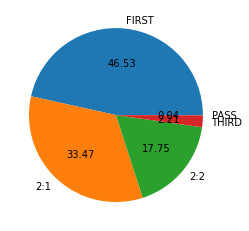

In [28]:

import matplotlib.pyplot as plt


options = ["FIRST", "2:1", "2:2", "THIRD", "PASS"]

plt.rcParams["figure.figsize"] = (8,6)
plt.pie(df['award_classification'].value_counts(), labels=options, autopct="%0.2f")
plt.show()

<AxesSubplot:xlabel='award_classification', ylabel='count'>

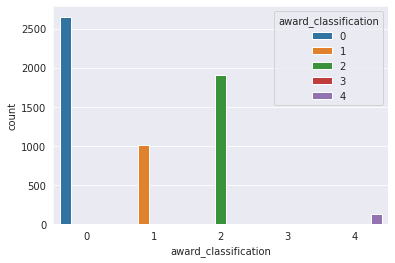

In [41]:
# Barplots of award_classification

import seaborn as sns

sns.set_style('darkgrid')

sns.countplot(x="award_classification", data=df, hue="award_classification")

In [33]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/abbracx/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [35]:

# Get number of characters
df['num_characters'] = df['personal_statement'].apply(len)

# Get number of words
df['num_words'] = df['personal_statement'].apply(lambda x: len(nltk.word_tokenize(x)))


# Get number of sentences
df['num_sentences'] = df['personal_statement'].apply(lambda x: len(nltk.sent_tokenize(x)))
                                                                                                                            

In [36]:
df.head(10)

,studentID,personal_statement,award_name,award_classification,num_characters,num_words,num_sentences
9,199921636,I am applying for the learning disability nurs...,Bachelor of Science with Honours,2,3590,721,21
13,200030551,I wish to apply to university this year as I w...,Bachelor of Arts with Honours,2,1593,303,12
15,200127457,I have worked in mainstream and special educat...,Bachelor of Arts with Honours,2,1732,306,9
16,200200708,At approximately six years old I remember sitt...,Bachelor of Arts with Honours,2,3324,581,18
18,200200788,"When I left school in 1994, I knew I wanted a ...",Bachelor of Science with Honours,0,3992,771,28
40,200512117,I have been looking forward to getting into te...,Bachelor of Arts with Honours,4,2368,428,16
42,200513035,"Nursing, in my own perspective, is a diverse p...",Bachelor of Science with Honours,1,3903,699,29
46,200610674,I am enthusiastic about the nursing profession...,Bachelor of Science with Honours,1,2662,438,16
64,200878511,"Nursing to me is an invaluable profession, whi...",Bachelor of Science with Honours,2,3822,717,26
74,200888939,The passion I have for nursing comes from witn...,Bachelor of Science with Honours,0,3956,715,25


In [42]:
# statistical description of newly created features
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5700.000000,5700.000000,5700.000000
mean,2635.970000,486.781228,18.327368
std,1672.057098,308.567907,11.691261
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,3571.500000,656.000000,22.000000
75%,3929.000000,716.000000,27.000000
max,6378.000000,1122.000000,61.000000


In [44]:
# statistical description of words for all First Class
df[df['award_classification'] == 2][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1908.000000,1908.000000,1908.000000
mean,2862.166667,525.904612,19.990566
std,1585.008259,291.145157,11.221838
min,1.000000,1.000000,1.000000
25%,2530.500000,455.500000,15.000000
50%,3705.500000,676.000000,24.000000
75%,3955.000000,719.000000,28.000000
max,6011.000000,1089.000000,61.000000


In [45]:
# statistical description of words for all 2:1
df[df['award_classification'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2652.000000,2652.000000,2652.000000
mean,2563.289593,473.805430,17.870664
std,1705.883407,315.036091,11.883831
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,3543.500000,651.000000,22.000000
75%,3921.000000,713.250000,27.000000
max,6378.000000,1122.000000,49.000000


In [46]:
# statistical description of words for all THIRD
df[df['award_classification'] == 4][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,126.000000,126.000000,126.000000
mean,2764.896825,514.650794,18.126984
std,1531.465399,284.609440,10.234830
min,1.000000,1.000000,1.000000
25%,2385.000000,452.750000,12.000000
50%,3564.500000,661.000000,21.000000
75%,3871.250000,710.750000,26.000000
max,3999.000000,774.000000,35.000000


In [47]:
# statistical description of words for all 2:2
df[df['award_classification'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1012.000000,1012.000000,1012.000000
mean,2382.619565,443.302372,16.400198
std,1709.420444,318.128540,11.836293
min,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000
50%,3350.500000,616.000000,20.000000
75%,3848.250000,708.000000,26.000000
max,5581.000000,1059.000000,49.000000


In [48]:
# statistical description of words for all PASS
df[df['award_classification'] == 3][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2.000000,2.000000,2.000000
mean,3291.500000,613.500000,25.000000
std,877.519515,132.228968,4.242641
min,2671.000000,520.000000,22.000000
25%,2981.250000,566.750000,23.500000
50%,3291.500000,613.500000,25.000000
75%,3601.750000,660.250000,26.500000
max,3912.000000,707.000000,28.000000


<Figure size 864x432 with 0 Axes>

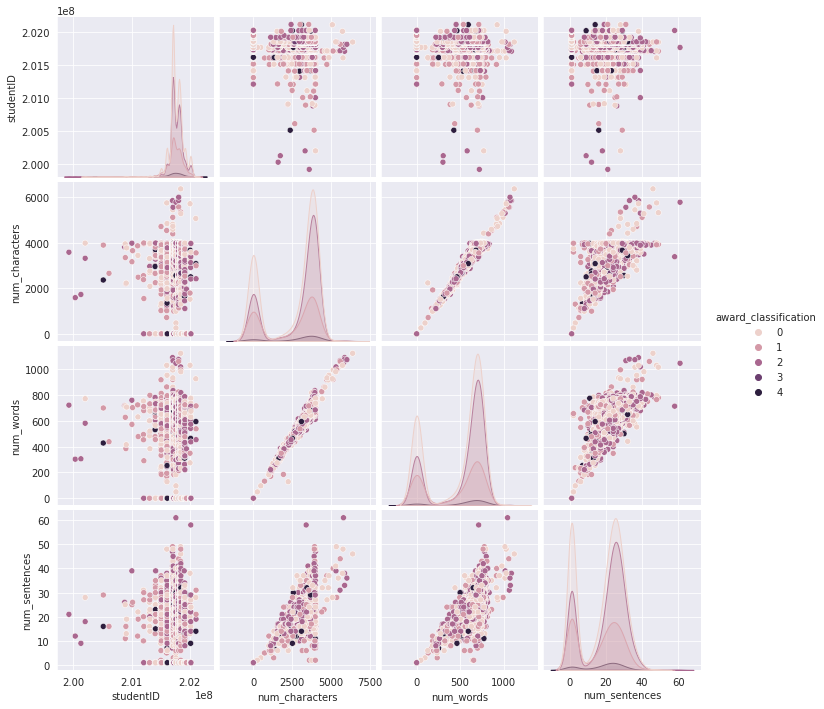

In [50]:
plt.figure(figsize=(12, 6))
sns.pairplot(df, hue='award_classification')

<AxesSubplot:>

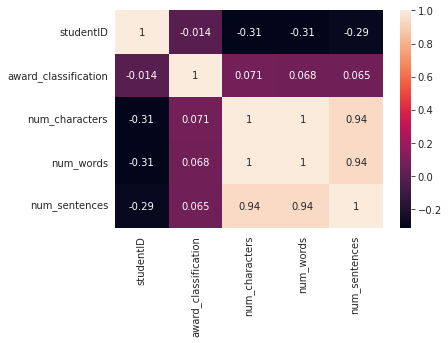

In [51]:
sns.heatmap(df.corr(), annot=True)